In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from gw150814_simulator import GW150814, defaults, GW150814_Additive
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [14]:
simulator = GW150814(defaults)

Loading data for H1 at GPS time 1126259462.4
Loading PSD for H1 at GPS time 1126259462.4 [can take O(1 min)]
Loading posterior samples from GW150814_posterior_samples.npz


100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


(-0.1, 0.1)

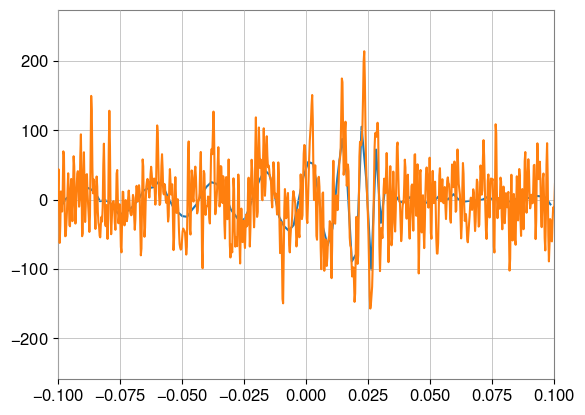

In [15]:
sample = simulator.sample(1)

plt.plot(simulator._process(simulator.times), sample['mu'][0], color="C0", alpha=1)
plt.plot(simulator.times, simulator.filter_gwosc_data(), alpha=1, color="C1", zorder=10, label="GWOSC data")
plt.xlim(-0.1, 0.1)


Text(0, 0.5, 'Strain')

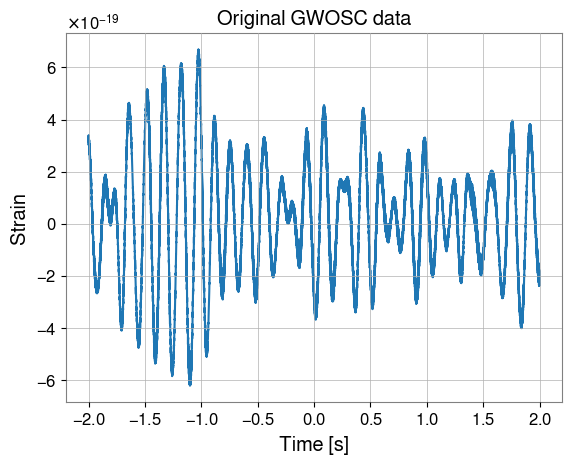

In [5]:
# Plot the original, unfiltered data
plt.figure()
plt.title("Original GWOSC data")
plt.plot(simulator.times, simulator.data_gwosc.value)
plt.xlabel("Time [s]")
plt.ylabel("Strain")

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 301.62it/s]


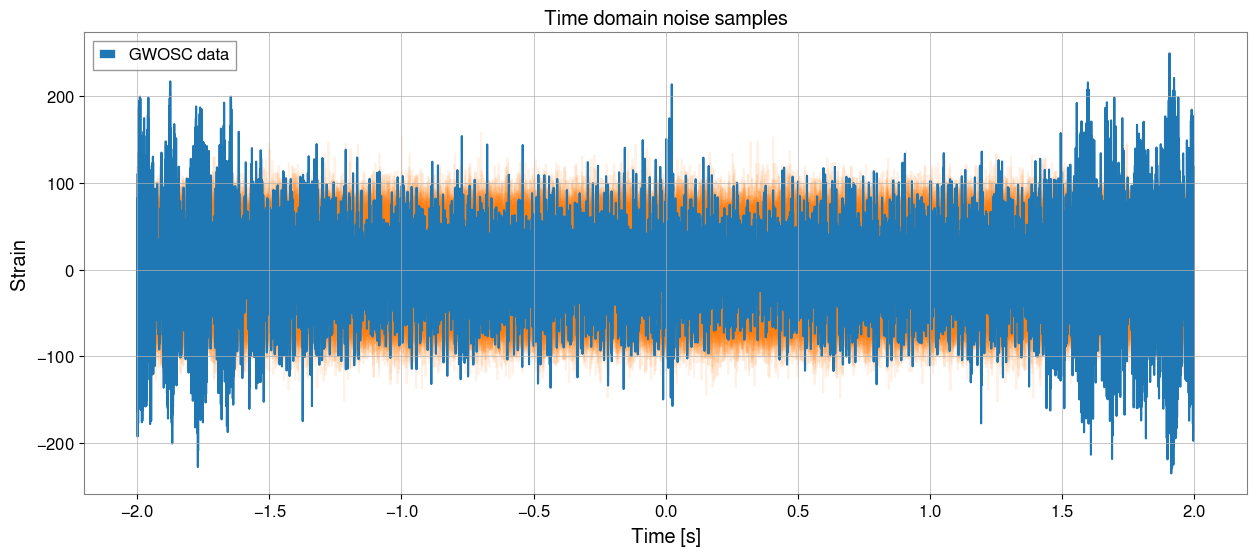

In [16]:
# Plot samples from noise generator
plt.figure(figsize=(15, 6))
plt.title("Time domain noise samples")
for _ in tqdm(range(100)):
    plt.plot(simulator.times, simulator.generate_time_domain_noise(), color='C1', alpha=0.1)
plt.plot(simulator.times, simulator.filter_gwosc_data(), color='C0', label="GWOSC data")
plt.xlabel("Time [s]")
plt.ylabel("Strain")
plt.legend()


 31%|███       | 31/100 [00:00<00:00, 303.91it/s]

100%|██████████| 100/100 [00:00<00:00, 301.81it/s]


(-0.2, 0.2)

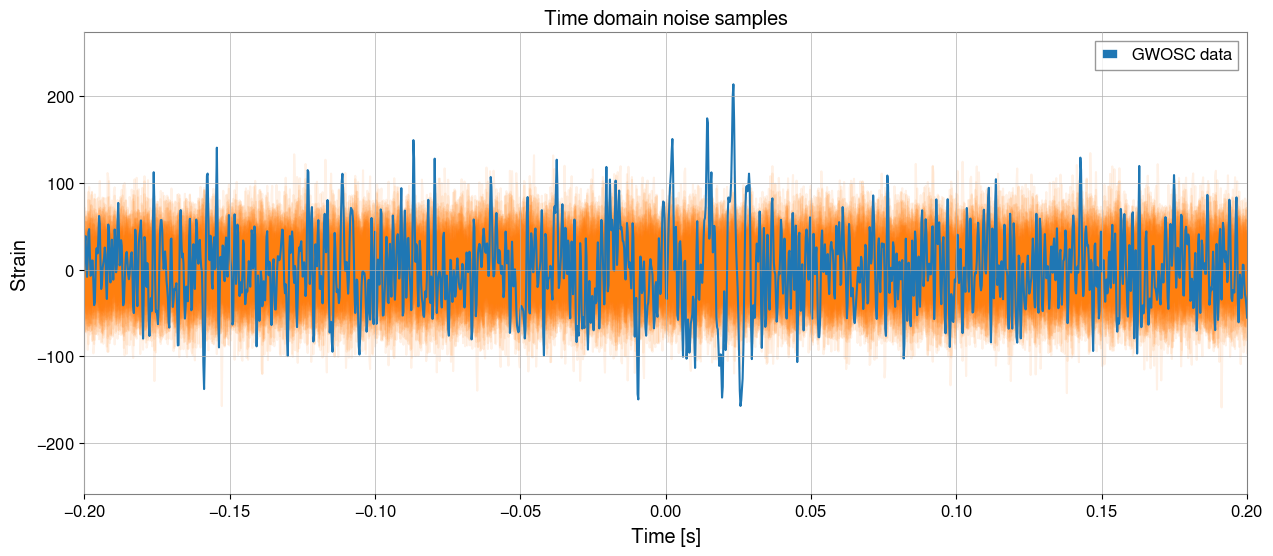

In [17]:
# Plot samples from noise generator
plt.figure(figsize=(15, 6))
plt.title("Time domain noise samples")
for _ in tqdm(range(100)):
    plt.plot(simulator.times, simulator.generate_time_domain_noise(), color='C1', alpha=0.1)
plt.plot(simulator.times, simulator.filter_gwosc_data(), color='C0', label="GWOSC data")
plt.xlabel("Time [s]")
plt.ylabel("Strain")
plt.legend()
plt.xlim(-0.2, 0.2)

  2%|▏         | 24/1000 [00:00<00:12, 79.06it/s]

100%|██████████| 1000/1000 [00:13<00:00, 73.26it/s]


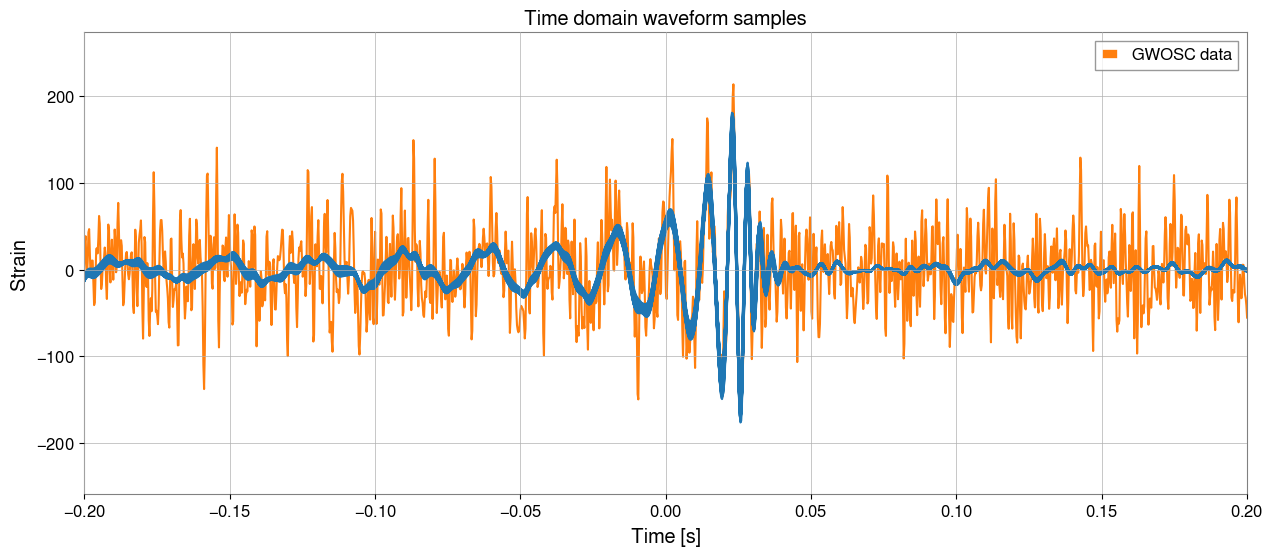

In [8]:
# Generate posterior samples from waveform generator
plt.figure(figsize=(15, 6))
plt.title("Time domain waveform samples")
for _ in tqdm(range(1000)):
    signal_td = simulator.generate_time_domain_waveform()
    plt.plot(simulator.times, signal_td, color="C0", alpha=1.)
plt.plot(simulator.times, simulator.filter_gwosc_data(), color="C1", zorder=-10, label="GWOSC data")
plt.xlim(-0.2, 0.2)
plt.xlabel("Time [s]")
plt.ylabel("Strain")
plt.legend();

  1%|          | 7/1000 [00:00<00:15, 63.89it/s]

100%|██████████| 1000/1000 [00:14<00:00, 67.34it/s]


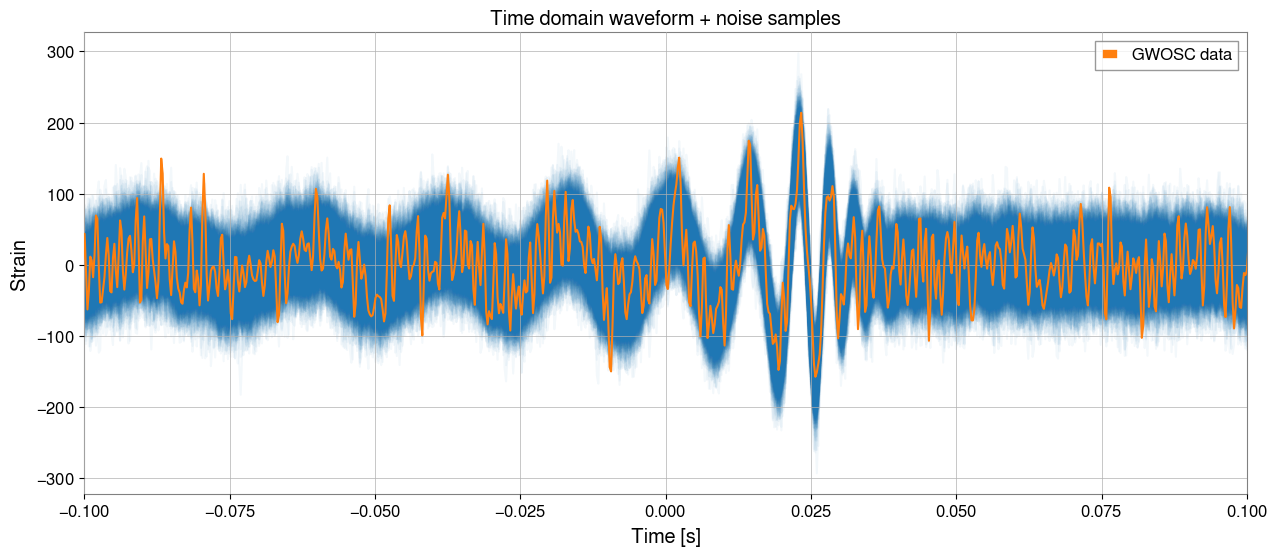

In [9]:
# Generate posterior samples from waveform generator
plt.figure(figsize=(15, 6))
plt.title("Time domain waveform + noise samples")
for _ in tqdm(range(1000)):
    signal_td = simulator.generate_time_domain_waveform()
    noise_td = simulator.generate_time_domain_noise()
    plt.plot(simulator.times, signal_td + noise_td, color="C0", alpha=0.05)
plt.plot(simulator.times, simulator.filter_gwosc_data(), color="C1", zorder=10, label="GWOSC data")
plt.xlim(-0.1, 0.1)
plt.xlabel("Time [s]")
plt.ylabel("Strain")
plt.legend();

### Check sampling functions

In [10]:
import torch


# simulator = GW150814(defaults)
s = simulator.sample(10)
# torch.save(s, "s")

s['mu'].shape

100%|██████████| 10/10 [00:00<00:00, 63.86it/s]


torch.Size([10, 102])

In [ ]:
gw150814_post = torch.load('./stores/gw150814_post_d2_m1_1010k.pt')
gw150814_noise = torch.load('./stores/gw150814_noise_d2_m1_1M.pt')
gw150814_samples = {'mu': gw150814_post, 'noise': gw150814_noise}
# gw150814_samples = torch.load('./stores/gw150814_samples_d8_m1_500k.pt')
simulator1 = GW150814_Additive(
    gw150814_samples=gw150814_samples, 
    bounds=2, #1.2341, 0.5696, 0.3403]), 
    dtype=torch.float32,
)

times = simulator1._process(simulator.times)
Nbins = simulator1.Nbins

Loading data for H1 at GPS time 1126259462.4
Loading PSD for H1 at GPS time 1126259462.4 [can take O(1 min)]
Loading posterior samples from GW150814_posterior_samples.npz


In [ ]:
simulator1.sample(1)

defaultdict(list,
            {'mu': tensor([[-1.0901e-22, -1.1422e-22, -1.1741e-22, -1.1881e-22, -1.1876e-22,
                      -1.1754e-22, -1.1520e-22, -1.1162e-22, -1.0652e-22, -9.9613e-23,
                      -9.0616e-23, -7.9315e-23, -6.5683e-23, -4.9991e-23, -3.2809e-23,
                      -1.4865e-23,  3.1433e-24,  2.0657e-23,  3.7268e-23,  5.2720e-23,
                       6.6943e-23,  8.0056e-23,  9.2256e-23,  1.0365e-22,  1.1412e-22,
                       1.2338e-22,  1.3109e-22,  1.3691e-22,  1.4055e-22,  1.4179e-22,
                       1.4054e-22,  1.3691e-22,  1.3118e-22,  1.2368e-22,  1.1456e-22,
                       1.0383e-22,  9.1418e-23,  7.7217e-23,  6.1147e-23,  4.3155e-23,
                       2.3322e-23,  1.9901e-24, -2.0203e-23, -4.2454e-23, -6.3985e-23,
                      -8.4171e-23, -1.0255e-22, -1.1884e-22, -1.3293e-22, -1.4495e-22,
                      -1.5516e-22, -1.6376e-22, -1.7069e-22, -1.7571e-22, -1.7844e-22,
                   